## Metropolis-Hastings Algorithm

Now we implement the simple Metropolis-Hasting algorithm. As usual, this code is meant for pedagogical purposes, not performance.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import corner

In [2]:
def metropolis_hastings(func, x0, args, dimensions = 1, limits = [-1., 1.], n = 10000):
    """
    ABOUT
    -----
    This is a generic implementation of the Metropolis-Hastings Monte Carlo algorithm.
    This function works for more than one dimension.
    Note that here if we want to sample from a gaussian, for instance, func must be the corresponding logarithm.
    
    INPUT
    -----
    . f: function to be sampled from
    . x0: argument that will be passed to func
    . args: arguments that will be passed to func
    . dimensions: number of dimensions
    . limits: the limits for the random number generation (uniform func between limits[0], and limits[1]
    . n: number of points to be drawn
    """
    accept = reject = 0
    dz = np.zeros(dimensions)
    p0 = func(x0, args)
    chain = np.zeros((dimensions, n + 1))
    previous = x0
    chain[:, 0] = x0
    proposal = previous
    for i in range(1, n + 1):
        delta = dz
        delta[i % dimensions] = np.random.uniform(low = limits[0], high = limits[1])
        proposal = previous +  delta
        p1 = func(proposal, args)
        p = p1 - p0
        u = np.log(np.random.uniform())
        if u < p:
            chain[:, i] = proposal
            previous, p0  = proposal, p1 
            accept += 1
        else:
            chain[:,i] = previous
            reject += 1
            
    return chain

Let's define a custom function:

In [3]:
def myFunction1(xs, args):
    """
    This function is just the log of a 2D gaussian.
    """
    x, y = xs[0], xs[1]
    mux, sigx = args[0]
    muy, sigy = args[1]
    #     return (x - mux) ** 2 / (2. * sigx ** 2) + (y - muy) ** 2 / (2. * sigy ** 2)
    return -0.5*(1.1905*x**2 - 0.952*x*y + 1.1905*y**2)


In [4]:
args = [[1., 1.], [1., 3.]]
guess = [1., 1.]
res1 = metropolis_hastings(myFunction1, guess, args, dimensions = 2, limits = [-5, 5], n = 100000)

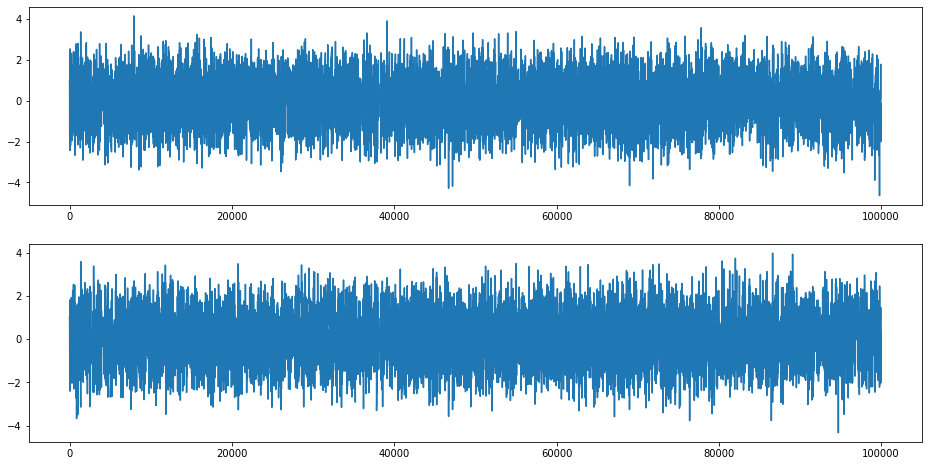

In [5]:
fig = plt.figure(figsize = (16, 8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.plot(res1[0])
ax2.plot(res1[1])


In [6]:
res1t = res1.T # transpose

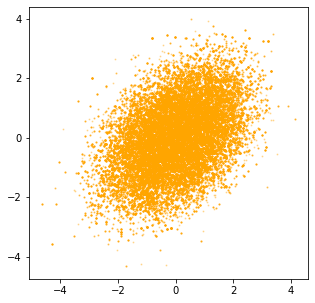

In [7]:
plt.figure(figsize=(5,5))
plt.scatter(res1t[1000:, 0], res1t[1000:, 1], marker='.', c = 'orange', s = 4,  alpha = .3)

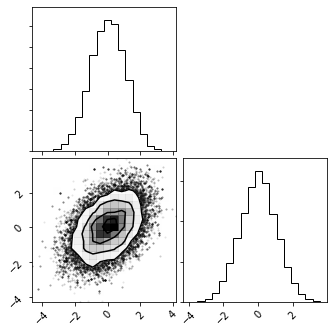

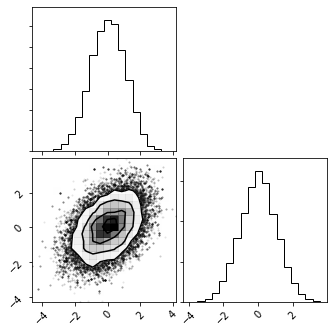

In [8]:
corner.corner(res1t)